<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Trees/LinearRegression_FitModel_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting 1D regression model

The purpose of this Python notebook experiment with fitting the 1D regression model with a least squares loss using coordinate descent.

You can save a local copy of this notebook in your Google account and work through it in Colab (recommended) or you can download the notebook and run it locally using Jupyter notebook or similar.  

Contact me at iclimbtreesmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
# Time library
import time
# Used to update figures
from IPython import display

In [2]:
# Create the same input / output data as used in the unit
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

# Define the model and the least squares loss

The linear regression model is defined as:

$$\textrm{f}[x,\boldsymbol\phi] = \phi_0+\phi_1 x$$

where $\phi_0$ is the y-intercept and $\phi_1$ is the slope.

In [3]:
def f(x, phi0, phi1):
    return phi0 + phi1 * x


The least squares loss is defined as the sum of the squared deviations of the model output $\textrm{f}[x_i,\boldsymbol\phi]$ and the true output target $y_i$:

 \begin{align} L[\boldsymbol\phi] & = \sum_{i=1}^{I} \bigl(\textrm{f}[x_{i}, \boldsymbol\phi]-y_{i}\bigr)^{2}  \\ &= \sum_{i=1}^{I} \bigl(\phi_{0}+\phi_{1}x_i-y_{i}\bigr)^{2} \tag{1.2}\end{align}

In [4]:
# Function to calculate the loss
def compute_loss(x,y,f,phi0,phi1):

  signed_distance = f(x,phi0,phi1)-y
  loss = np.sum(signed_distance * signed_distance)

  return loss

# Fit the model

We'll fit the model using a version of coordinate descent. We first choose a step size $\alpha$ and then we alternate between updating the intercept parameter $\phi_0$ and the slope parameter $\phi_1$.  

1.  Compare the loss for models with $[\phi_0, \phi_1]$,  $[\phi_0+\alpha, \phi_1]$,  and $[\phi_0-\alpha, \phi_1]$. Update the parameters according to the set that have the minimum loss.

2. Compare the loss for models with $[\phi_0, \phi_1]$, $[\phi_0,\phi_1+\alpha]$, and $[\phi_0, \phi_1-\alpha]$.

We'll alternate these two steps until we cannot improve any further.

In [29]:
# Utility function for plotting the three models at each stage
def plot(fig,ax, x,y, f, phi0_1, phi1_1, phi0_2, phi1_2, phi0_3, phi1_3, loss1, loss2, loss3):
    x_plot = np.linspace(0,2,100)

    # Clear previous drawing on these axes
    ax.clear()
    # Plotting code
    ax.plot(x,y,'bo')
    ax.plot(x_plot,f(x_plot, phi0_1, phi1_1), 'r-')
    ax.plot(x_plot,f(x_plot, phi0_2, phi1_2), 'g-')
    ax.plot(x_plot,f(x_plot, phi0_3, phi1_3), 'b-')
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)
    ax.set_title('Losses: {:.2f}(red), {:.2f} (green), {:.2f} (blue)'.format(loss1, loss2, loss3))
    ax.set_aspect('equal', adjustable='box')

    # Show the figure and wait 0.1 sec
    display.display(fig)
    time.sleep(0.1)
    display.clear_output(wait=True)


In [30]:
# Main fitting algorithm
def fit_model(x,y,f,compute_loss,phi0_init, phi1_init, alpha, n_iter):

  # Create figure to display results
  fig,ax = plt.subplots()

  # These two variables to store the evolution of the parameters
  phi0_progress = np.zeros(n_iter)
  phi1_progress = np.zeros(n_iter)

  # Initialize the history with the provided values
  phi0_progress[0] = phi0_init
  phi1_progress[0] = phi1_init

  # Main iteration loop
  for c_iter in range(1, n_iter):
    # Choose parameters for first model [phi0, phi1]
    phi0_1 = phi0_progress[c_iter-1]
    phi1_1 = phi1_progress[c_iter-1]

    # Change the intercept phi0 every other iteration
    if (c_iter%2==0):
      # Choose parameters for second model [phi_0+alpha, phi1]
      phi0_2 = phi0_progress[c_iter-1]+alpha
      phi1_2 = phi1_progress[c_iter-1]

      # Choose parameters for third model [phi_0+alpha, phi1]
      phi0_3 = phi0_progress[c_iter-1]-alpha
      phi1_3 = phi1_progress[c_iter-1]

    # Change the slope phi1 every other iteration
    else:
      # Choose parameters for second model [phi_0, phi1+alpha]
      phi0_2 = phi0_progress[c_iter-1]
      phi1_2 = phi1_progress[c_iter-1]+alpha

      # Choose parameters for third model [phi_0, phi1-alpha]
      phi0_3 = phi0_progress[c_iter-1]
      phi1_3 = phi1_progress[c_iter-1]-alpha

    # Compute the loss for the three models
    loss1 = compute_loss(x,y,f, phi0_1, phi1_1)
    loss2 = compute_loss(x,y,f, phi0_2, phi1_2)
    loss3 = compute_loss(x,y,f, phi0_3, phi1_3)



    # Set the parameters to the whichever model has the lowest loss
    match np.argmin(np.array([loss1, loss2, loss3]))+1:
      case 1:
        phi0_progress[c_iter] = phi0_1
        phi1_progress[c_iter] = phi1_1
      case 2:
        phi0_progress[c_iter] = phi0_2
        phi1_progress[c_iter] = phi1_2
      case 3:
        phi0_progress[c_iter] = phi0_3
        phi1_progress[c_iter] = phi1_3

    # Plot the progress
    plot(fig, ax, x,y, f, phi0_1, phi1_1, phi0_2, phi1_2, phi0_3, phi1_3, loss1, loss2, loss3)

  return phi0_progress, phi1_progress

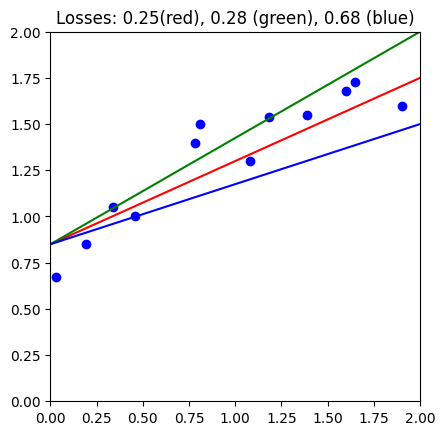

In [31]:
# Run the fitting algorithm
phi0_progress, phi1_progress = fit_model(x,y,f,compute_loss,phi0_init=1.35, phi1_init=-0.55, alpha=0.125, n_iter=20)

In [34]:
# Helper code to do the drawing
def draw_loss_function(compute_loss, f, x_in, y_in, phi0_progress, phi1_progress):
  # Define pretty colormap
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Make grid of intercept/slope values to plot
  intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.002))
  loss_mesh = np.zeros_like(slopes_mesh)

  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(slopes_mesh):
     loss_mesh[idslope] = compute_loss(x_in, y_in, f, intercepts_mesh[idslope], slope)

  fig,ax = plt.subplots()
  fig.set_size_inches(6,6)
  ax.contourf(intercepts_mesh,slopes_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(intercepts_mesh,slopes_mesh,loss_mesh,40,colors=['#80808080'])
  ax.plot(phi0_progress, phi1_progress, 'o-', color='#7fe7dc')

  ax.set_ylim([1,-1])
  ax.set_xlabel('Intercept, $\phi_0$')
  ax.set_ylabel('Slope, $\phi_1$')
  ax.set_aspect('equal')
  plt.show()

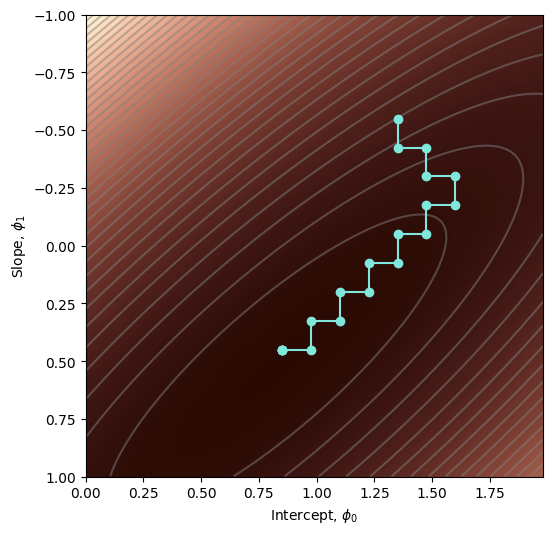

In [35]:
draw_loss_function(compute_loss, f,  x, y, phi0_progress, phi1_progress)